#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Read file

In [2]:
df = pd.read_csv('financial_loan.csv')

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


#### Understanding the data

In [4]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership  issue_date  \
0                                Ryder     C           RENT  11-02-2021   
1                       MKC Accounting     E           RENT  01-01-2021   
2                Chema

In [5]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [6]:
df.isna().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [7]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_13276\3287190382.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


#### Encoding

In [8]:
le = LabelEncoder()
df['address_state'] = le.fit_transform(df['address_state'])
df['application_type'] = le.fit_transform(df['application_type'])
df['emp_length'] = le.fit_transform(df['emp_length'])
df['emp_title'] = le.fit_transform(df['emp_title'])
df['grade'] = le.fit_transform(df['grade'])
df['home_ownership'] = le.fit_transform(df['home_ownership'])
df['issue_date'] = le.fit_transform(df['issue_date'])
df['last_credit_pull_date'] = le.fit_transform(df['last_credit_pull_date'])
df['last_payment_date'] = le.fit_transform(df['last_payment_date'])
df['loan_status'] = le.fit_transform(df['loan_status'])
df['next_payment_date'] = le.fit_transform(df['next_payment_date'])
df['purpose'] = le.fit_transform(df['purpose'])
df['sub_grade'] = le.fit_transform(df['sub_grade'])
df['term'] = le.fit_transform(df['term'])
df['verification_status'] = le.fit_transform(df['verification_status'])

In [9]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,10,0,10,18808,2,4,49,73,63,...,13,1,1,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,4,0,9,13534,4,4,0,88,84,...,20,0,1,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,4,0,4,4462,2,4,4,64,12,...,14,0,0,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,42,0,10,25432,1,0,64,64,50,...,6,1,1,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,14,0,1,11421,0,0,0,88,84,...,0,0,2,83000.0,0.0231,106.53,0.0603,3500,28,3835


#### Split data

In [10]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic regression model

In [12]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Evaluation

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.89282011404873


In [14]:
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[ 557    7  500]
 [   2    0  228]
 [  76   14 6332]]


In [15]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.52      0.66      1064
           1       0.00      0.00      0.00       230
           2       0.90      0.99      0.94      6422

    accuracy                           0.89      7716
   macro avg       0.59      0.50      0.53      7716
weighted avg       0.87      0.89      0.87      7716



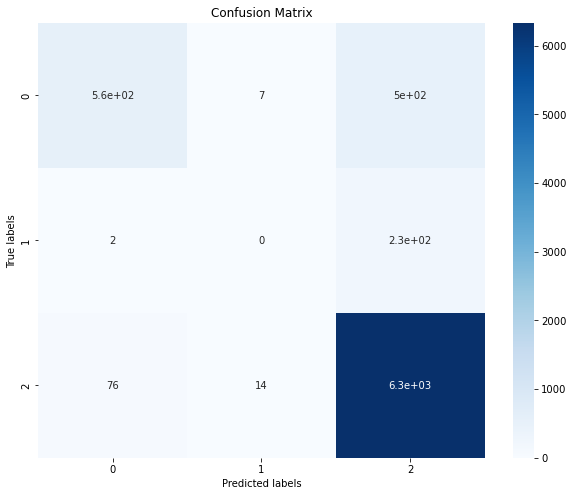

In [16]:
# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()